In [1]:
from sys import path as syspath
from os import path as ospath

from cbsa import ReactionSystem
import stochpy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


#######################################################################
#                                                                     #
#            Welcome to the interactive StochPy environment           #
#                                                                     #
#######################################################################
#  StochPy: Stochastic modeling in Python                             #
#  http://stochpy.sourceforge.net                                     #
#  Copyright(C) T.R Maarleveld, B.G. Olivier, F.J Bruggeman 2010-2015 #
#  DOI: 10.1371/journal.pone.0079345                                  #
#  Email: tmd200@users.sourceforge.net                                #
#  VU University, Amsterdam, Netherlands                              #
#  Centrum Wiskunde Informatica, Amsterdam, Netherlands               #
#  StochPy is distributed under the BSD licence.                      #
###############################################################

In [2]:
from matplotlib import rc
rc('text', usetex=True)
plt.style.use("bmh")
plt.rcParams["font.family"] = "serif"
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [3]:
S = [[-1,-1],
     [1,0], 
     [0,1]]

R = [[0,0],
     [0,0],
     [0,0]]

x = [100,0,0]
k = [.2,.6]

max_dt = 0.01

total_sim_time = 15

alpha = 0.5

cbsa = ReactionSystem(S)
cbsa.setup()
cbsa.set_x(x)
cbsa.set_k(k)


In [4]:
smod = sp.SSA()
smod.Model('Noise_Analysis.psc')
smod.ChangeParameter("k1",k[0])
smod.ChangeParameter("k2",k[1])
smod.ChangeInitialSpeciesCopyNumber("A",x[0])
smod.ChangeInitialSpeciesCopyNumber("B",x[1])
smod.ChangeInitialSpeciesCopyNumber("C",x[2])

In [5]:
cbsa_data = []
sp_ssa_data = []
sp_ssa_tau_data = []


replicates = 2000

for repl in range(replicates):
    cbsa.setup_simulation(use_opencl=False,alpha=alpha,max_dt=max_dt)
    cbsa.compute_simulation(total_sim_time,batch_steps=1)
    cbsa_data.append(np.array(cbsa.simulation_data))

    smod.DoStochSim(mode='time',end=total_sim_time,trajectories=1)
    sp_ssa_data.append(smod.data_stochsim.getSpecies())

    smod.DoStochSim(method='Tauleap',mode='time',end=total_sim_time,trajectories=1)
    sp_ssa_tau_data.append(smod.data_stochsim.getSpecies())

/home/burke/anaconda3/envs/gpu/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


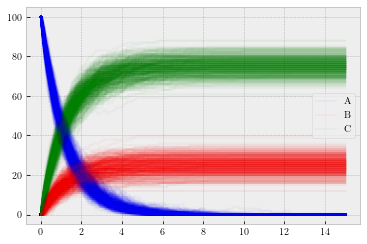

In [6]:
plt.plot(cbsa_data[0][:,0],cbsa_data[0][:,1],color = "blue",alpha=0.03,label="A")
plt.plot(cbsa_data[0][:,0],cbsa_data[0][:,2],color = "red",alpha=0.03,label="B")
plt.plot(cbsa_data[0][:,0],cbsa_data[0][:,3],color = "green",alpha=0.03,label="C")
for i in range(1,500):
    plt.plot(cbsa_data[i][:,0],cbsa_data[i][:,1],color = "blue",alpha=0.03)
    plt.plot(cbsa_data[i][:,0],cbsa_data[i][:,2],color = "red",alpha=0.03)
    plt.plot(cbsa_data[i][:,0],cbsa_data[i][:,3],color = "green",alpha=0.03)
plt.legend()
plt.show()

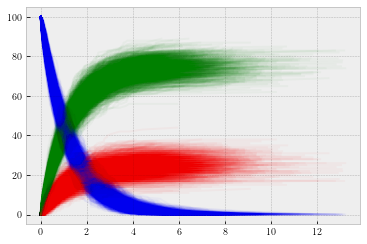

In [7]:
for i in range(replicates):
    plt.plot(sp_ssa_data[i][:,0],sp_ssa_data[i][:,1],color = "blue",alpha=0.03)
    plt.plot(sp_ssa_data[i][:,0],sp_ssa_data[i][:,2],color = "red",alpha=0.03)
    plt.plot(sp_ssa_data[i][:,0],sp_ssa_data[i][:,3],color = "green",alpha=0.03)
plt.show()

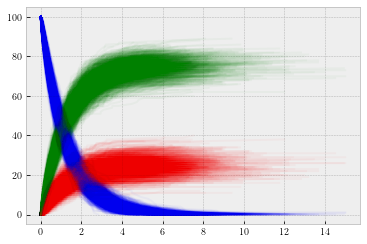

In [8]:
for i in range(replicates):
    plt.plot(sp_ssa_tau_data[i][:,0],sp_ssa_tau_data[i][:,1],color = "blue",alpha=0.03)
    plt.plot(sp_ssa_tau_data[i][:,0],sp_ssa_tau_data[i][:,2],color = "red",alpha=0.03)
    plt.plot(sp_ssa_tau_data[i][:,0],sp_ssa_tau_data[i][:,3],color = "green",alpha=0.03)
plt.show()

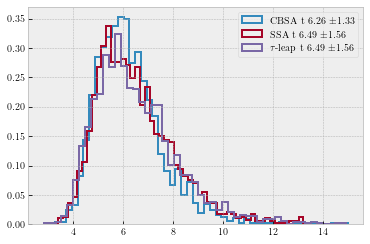

In [9]:
bins = 51
cbsa_ends = [cbsa_data[i][np.where(cbsa_data[i][:,1]==0)[0][0],0] for i in range(replicates) if len(np.where(cbsa_data[i][:,1]==0)[0])]
sp_ssa_ends = [sp_ssa_data[i][np.where(sp_ssa_data[i][:,1]==0)[0][0],0] for i in range(replicates) if len(np.where(sp_ssa_data[i][:,1]==0)[0])]
gilles_ssa_tau_ends = [sp_ssa_tau_data[i][np.where(sp_ssa_tau_data[i][:,1]==0)[0][0],0] for i in range(replicates) if len(np.where(sp_ssa_tau_data[i][:,1]==0)[0])]
plt.hist(cbsa_ends,density=True,bins=bins,histtype="step",linewidth=2,label = 'CBSA t '+str(np.round(np.mean(cbsa_ends),2))+" $\pm$"+str(np.round(np.std(cbsa_ends),2)))
plt.hist(sp_ssa_ends,density=True,bins=bins,histtype="step",linewidth=2,label = 'SSA t '+str(np.round(np.mean(sp_ssa_ends),2))+" $\pm$"+str(np.round(np.std(sp_ssa_ends),2)))
plt.hist(gilles_ssa_tau_ends,density=True,bins=bins,histtype="step",linewidth=2,label = r'$\tau$-leap t '+str(np.round(np.mean(sp_ssa_ends),2))+" $\pm$"+str(np.round(np.std(sp_ssa_ends),2)))
plt.legend()
plt.show()

CBSA B mean 24.7635 variance 18.20956775
CBSA C mean 75.2365 variance 18.20956775
SP SSA B mean 24.9825 variance 20.044193749999998
SP SSA C mean 75.0175 variance 20.044193749999998
Tau-Leap B mean 24.803 variance 18.113191
Tau-Leap C mean 75.196 variance 18.119584


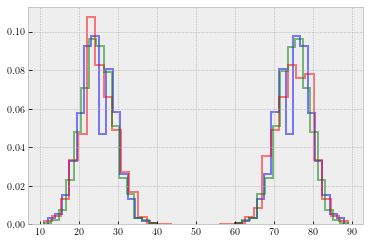

In [10]:
bins = 15
cbsa_A = [cbsa_data[i][-1,1] for i in range(replicates)]
cbsa_B = [cbsa_data[i][-1,2] for i in range(replicates)]
cbsa_C = [cbsa_data[i][-1,3] for i in range(replicates)]
sp_ssa_A = [sp_ssa_data[i][-1,1] for i in range(replicates)]
sp_ssa_B = [sp_ssa_data[i][-1,2] for i in range(replicates)]
sp_ssa_C = [sp_ssa_data[i][-1,3] for i in range(replicates)]
sp_tauleap_A = [sp_ssa_tau_data[i][-1,1] for i in range(replicates)]
sp_tauleap_B = [sp_ssa_tau_data[i][-1,2] for i in range(replicates)]
sp_tauleap_C = [sp_ssa_tau_data[i][-1,3] for i in range(replicates)]
print("CBSA B mean",np.mean(cbsa_B),"variance",np.var(cbsa_B))
print("CBSA C mean",np.mean(cbsa_C),"variance",np.var(cbsa_C))
print("SP SSA B mean",np.mean(sp_ssa_B),"variance",np.var(sp_ssa_B))
print("SP SSA C mean",np.mean(sp_ssa_C),"variance",np.var(sp_ssa_C))
print("Tau-Leap B mean",np.mean(sp_tauleap_B),"variance",np.var(sp_tauleap_B))
print("Tau-Leap C mean",np.mean(sp_tauleap_C),"variance",np.var(sp_tauleap_C))
plt.hist(cbsa_B,density=True,alpha=0.5,histtype="step",linewidth=2,color="blue",bins=bins)
plt.hist(cbsa_C,density=True,alpha=0.5,histtype="step",linewidth=2,color="Blue",bins=bins)
plt.hist(sp_ssa_B,density=True,alpha=0.5,histtype="step",linewidth=2,color="red",bins=bins)
plt.hist(sp_ssa_C,density=True,alpha=0.5,histtype="step",linewidth=2,color="red",bins=bins)
plt.hist(sp_tauleap_B,density=True,alpha=0.5,histtype="step",linewidth=2,color="green",bins=bins)
plt.hist(sp_tauleap_C,density=True,alpha=0.5,histtype="step",linewidth=2,color="green",bins=bins)
plt.show()

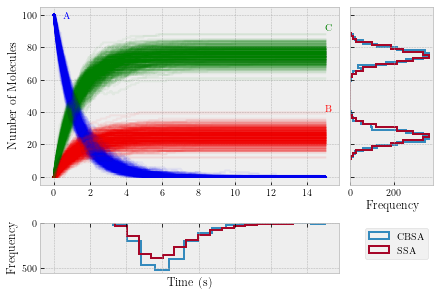

In [11]:
fig = plt.figure(constrained_layout=True)
spec = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
ax1 = fig.add_subplot(spec[0:2, 0:2])
ax2 = fig.add_subplot(spec[2, 0:2])
ax3 = fig.add_subplot(spec[0:2, 2])
ax4 = fig.add_subplot(spec[2, 2])


for i in range(1,500):
    ax1.plot(cbsa_data[i][:,0],cbsa_data[i][:,1],color = "blue",alpha=0.05)
    ax1.plot(cbsa_data[i][:,0],cbsa_data[i][:,2],color = "red",alpha=0.05)
    ax1.plot(cbsa_data[i][:,0],cbsa_data[i][:,3],color = "green",alpha=0.05)

ax1.set_ylabel("Number of Molecules")
ax1.text(0.5,98,"A",color="blue")
ax1.text(15,40,"B",color="red")
ax1.text(15,90,"C",color="green")
    
ax2.hist(cbsa_ends,bins=bins,histtype="step",linewidth=2,label = 'CBSA')
ax2.hist(sp_ssa_ends,bins=bins,histtype="step",linewidth=2,label = 'SSA')
#ax2.hist(gilles_ssa_tau_ends,density=True,bins=bins,histtype="step",linewidth=2,label = r'$\tau$-leap t '+str(np.round(np.mean(sp_ssa_ends),2))+" $\pm$"+str(np.round(np.std(sp_ssa_ends),2)))
ax2.set_xlim(ax1.get_xlim())
ax2.invert_yaxis()
ax2.set_xticklabels([])
ax2.xaxis.set_ticks_position('top')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Frequency")

bins = 40
ax3.hist(cbsa_B+cbsa_C,histtype="step",linewidth=2,bins=bins,orientation='horizontal')
ax3.hist(sp_ssa_B+sp_ssa_C,histtype="step",linewidth=2,bins=bins,orientation='horizontal')
#ax3.hist(sp_tauleap_B+sp_tauleap_C,density=True,histtype="step",linewidth=2,bins=bins,orientation='horizontal')
ax3.set_ylim(ax1.get_ylim())
ax3.set_yticklabels([])
ax3.set_xlabel("Frequency")

h,l = ax2.get_legend_handles_labels()
ax4.legend(h,l)
ax4.get_xaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)
ax4.set(frame_on=False)

fig.savefig("two_reactions.png",dpi=300, bbox_inches='tight')